In [1]:
import warnings

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.simplefilter('ignore')

## Feature Size Relative to Domain Size

### Current Density Normalized Standard Deviation

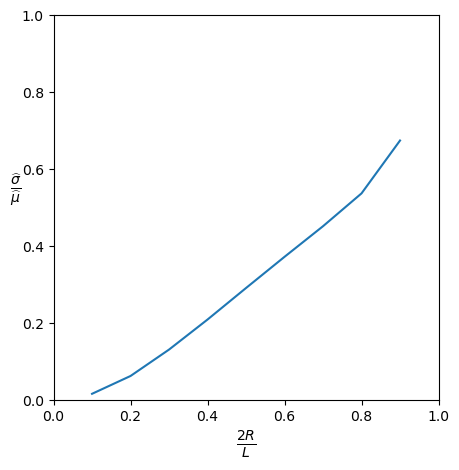

In [2]:
df = pd.read_excel('data/study_3.xlsx', sheet_name=['study_3_results'])

fig, ax = plt.subplots()

labels = {'study_3_results': '$L=L_0$'}
for k, v in labels.items():
    line, = ax.plot(df[k]['relative_radius'], df[k]['current_std'])
#     line.set_label(v)
# ax.legend();
ax.set_xlabel(r'$\frac{2R}{L}$', fontdict={'fontsize': 'x-large'});
ax.set_ylabel(r'$\frac{\widehat{\sigma}}{\widehat{\mu}}$', fontdict={'fontsize': 'x-large'}, rotation=0);
ax.set_xlim([0, 1]);
ax.set_ylim([0, 1]);
ax.set_box_aspect(1);
plt.tight_layout();
plt.savefig('figures/relative-size-features.png', dpi=1200);

### Current Density vs Angle

In [3]:
L = 1e-3

def get_angle(coord, radius):
    
    r = np.linalg.norm(coord[:-1] - 0.5 * L, 2)

    if not np.isclose(r/radius, 1):
        return np.nan
    
    if coord[1] < 0.5 * L:
        return np.nan

    adjacent = 0.5 * L - coord[0]

    return np.arccos(adjacent / radius)

In [27]:
def get_circle_coords(linemesh):
    coords = linemesh['/data0']
    lines = linemesh['/data1']
    markers = linemesh['/data2']
    line_coords = np.where(np.isclose(markers, 2))

    return np.unique(lines[line_coords])

In [33]:
def get_angular_values(rscale):
    R = rscale * 0.5 * L
    linemesh = h5py.File(f'data/study_3/{rscale}/line.h5', 'r')
    data = h5py.File(f'data/study_3/{rscale}/current.h5', 'r')
    coords = data['/Mesh/Grid/geometry']

    values = data['/Function/f/0']

    angles = []
    angles_values = []
    coords2 = get_circle_coords(linemesh)

    for i in range(coords.shape[0]):
        angle = get_angle(coords[i, :], radius=R)
        if np.isnan(angle):
            continue

        angles.append(angle)
        n = (coords[i, :] - np.array([0.5 * L, 0.5 * L, 0])) / R
#         n = np.array([-np.sin(angle), np.cos(angle), 0])
        angles_values.append(np.dot(values[i, :], n))
    
    angles = np.array(angles).reshape(-1, 1)
    angles_values = np.array(angles_values).reshape(-1, 1)
    arr = np.hstack((angles, angles_values))
    arr = np.take_along_axis(arr, np.argsort(arr, axis=0), axis=0)

    return arr

Processing for relative scale 0.1
Processing for relative scale 0.2
Processing for relative scale 0.3
Processing for relative scale 0.5
Processing for relative scale 0.6
Processing for relative scale 0.7
Processing for relative scale 0.8
Processing for relative scale 0.9


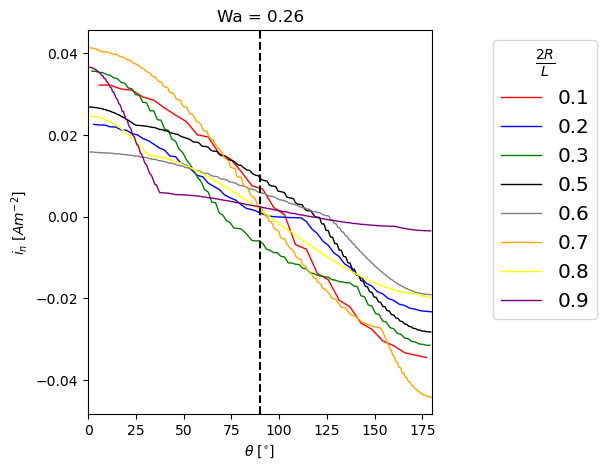

In [37]:
Wa = 0.2567831269109185
colors =  ['red', 'blue', 'green', 'black', 'grey', 'orange', 'yellow', 'purple', 'violet']
fig, ax = plt.subplots()

for i, rscale in enumerate([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]):
    print(f"Processing for relative scale {rscale}")
    arr = get_angular_values(rscale)
    line, = ax.plot(180 - (180/np.pi) * arr[:, 0], arr[:, 1], linewidth=1, color=colors[i]);
    line.set_label(f"{rscale}");
ax.axvline(x=90, color='black', ls='--');
ax.set_xlabel(r'$\theta$ [$^{\circ}$]');
ax.set_ylabel('$i_n$ [$Am^{-2}$]');
ax.set_xlim([0, 180]);
ax.set_title(f'Wa = {Wa:.2f}');
ax.legend(title=r'$\frac{2R}{L}$', bbox_to_anchor=(1.15, 1.0), title_fontsize='x-large', fontsize='x-large', loc='upper left');
plt.tight_layout();
plt.savefig('figures/relative-size-features-angular.png', dpi=1200);

## Apparent Effective Conductivity

In [ ]:
df = pd.read_excel('data/study_4.xlsx', sheet_name=['L0', 'L1', 'L2'])

fig, ax = plt.subplots()

labels = {'L0': '$L=L_0$', 'L1': '$L = 0.25 L_0$', 'L2': '$L=4L_0$'}
for k, v in labels.items():
    line, = ax.plot(df[k]['area_fraction'], df[k]['effective_conductivity'])
    line.set_label(v)
ax.legend();
ax.set_xlabel(r'$\frac{A}{A_0}$', fontdict={'fontsize': 'x-large'});
ax.set_ylabel(r'$\frac{\kappa_{eff}}{\kappa_{bulk}}$', fontdict={'fontsize': 'x-large'});
ax.set_xlim([0, 1]);
ax.set_ylim([0, 1]);
ax.set_box_aspect(1);
plt.tight_layout();
plt.savefig('figures/effective-conductivity-partial-area.png', dpi=1200);

## Contact Area Distributed

In [ ]:
# df = pd.read_csv('data/contact-area-distributed.csv')
# fig, ax = plt.subplots()
# ax.semilogx(df['n_pieces'], df['resistance [Ohm]'])
# ax.set_xlabel('$n_{pieces}$', fontdict={'size': 'x-large'});
# ax.set_ylabel('Resistance $[\Omega]$', fontdict={'size': 'x-large'});
# ax.set_title('$\kappa$ = 1 $Sm^{-1}$')
# plt.tight_layout();
# plt.savefig('figures/contact-area-distributed-semilog.png', dpi=1200);

In [7]:
df = pd.read_excel('data/contact-area-distributed.xlsx', sheet_name=['data2'])

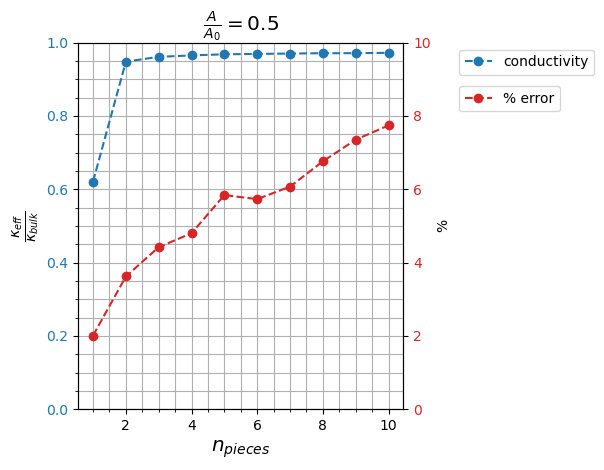

In [9]:
fig, ax = plt.subplots()
colors = ['tab:red', 'tab:blue']
line1, = ax.plot(df['data2']['n_pieces'], df['data2']['effective_conductivity'], 'o--', color=colors[1])
line1.set_label('conductivity')
ax.set_xlabel(r'$n_{pieces}$', fontdict={'fontsize': 'x-large'});
ax.set_ylabel(r'$\frac{\kappa_{eff}}{\kappa_{bulk}}$', fontdict={'fontsize': 'x-large'});
ax.set_title(r'$\frac{A}{A_0} = 0.5$', fontdict={'fontsize': 'x-large'})
ax2 = ax.twinx()
line2, = ax2.plot(df['data2']['n_pieces'], 100 * df['data2']['converge_error'], 'o--', color=colors[0]);
line2.set_label('% error')
ax2.set_ylabel('%');
ax.tick_params(axis='y', labelcolor=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[0])
ax.set_ylim([0, 1]);
ax2.set_ylim([0, 10]);
ax.legend();
ax.legend(bbox_to_anchor=(1.15, 1.0), loc='upper left');
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc='upper left');
ax.grid(True, which='both');
ax.minorticks_on()
plt.tight_layout();
plt.savefig('figures/contact-area-distributed-conductivity.png', dpi=1200);

# Contact Area Fraction and Aspect Ratio

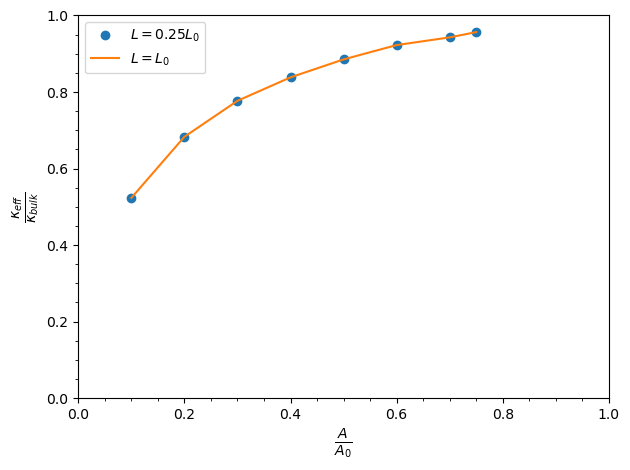

In [26]:
df = pd.read_excel('data/study_4.xlsx', sheet_name=['data1', 'data2'])
fig, ax = plt.subplots()
ax.plot(df['data1']['area_fraction'], df['data1']['effective_conductivity'], 'o', label='$L=0.25L_0$')
ax.plot(df['data2']['area_fraction'], df['data2']['effective_conductivity'], label='$L=L_0$')
ax.legend(loc='upper left')
ax.set_ylabel(r'$\frac{\kappa_{eff}}{\kappa_{bulk}}$', fontdict={'fontsize': 'x-large'});
ax.set_xlabel(r'$\frac{A}{A_0}$', fontdict={'fontsize': 'x-large'})
ax.set_xlim([0, 1]);
ax.set_ylim([0, 1]);
ax.minorticks_on()
plt.tight_layout();
plt.savefig('figures/contact-area-fraction-conductivity.png', dpi=1200);

In [11]:
df['data1'].head()

,area_fraction,effective_conductivity
0,0.099998,0.52333
1,0.200000,0.68311
2,0.300000,0.77708
3,0.400000,0.83840
4,0.500000,0.88527
